# GRIP MAY23 :- The Spark Foundations Data Science & Business Analytics 

# Task 1 : Prediction Using Supervised ML

###### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



###### Objective : What will be predicted score if a student studies for 9.25 hrs/ day?

#### Level : Beginner
#### IDE : Jupyter Notebook
### Author: Shikhar Pandey



# Data Preprocessing

In [1]:
#importing required libraries.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [8]:
# Reading the Data
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Visualization

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

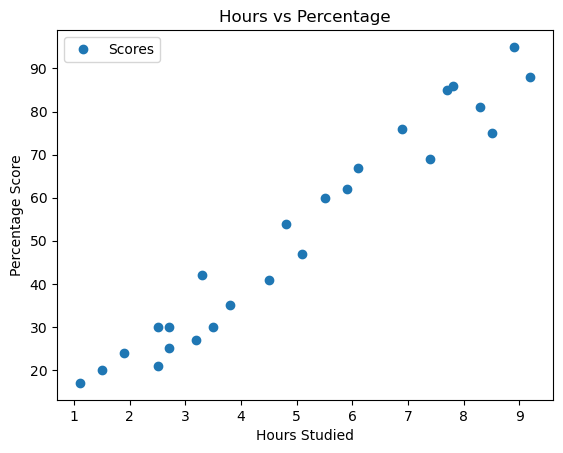

In [10]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.


# Preparing the data

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [17]:
from sklearn.model_selection  import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


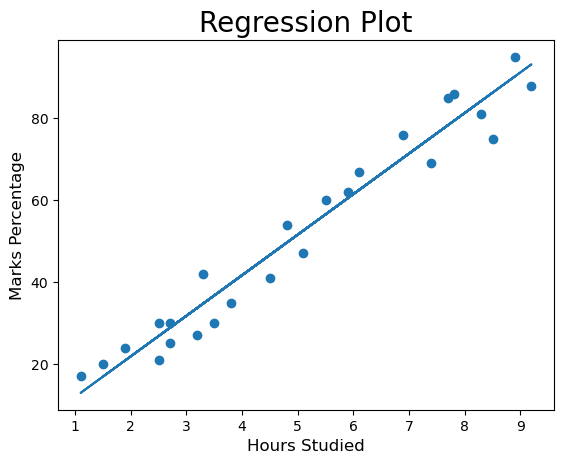

In [19]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [20]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


It is confirmed that the variables are positively correlated.

# Training the model

In [21]:
#Splitting the Data
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
     

#Fitting the Data into the model
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained")

Model Trained


In [27]:
#Predicting the Percentage of Marks
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [23]:
#Comparing the Predicted Marks with the Actual Marks
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


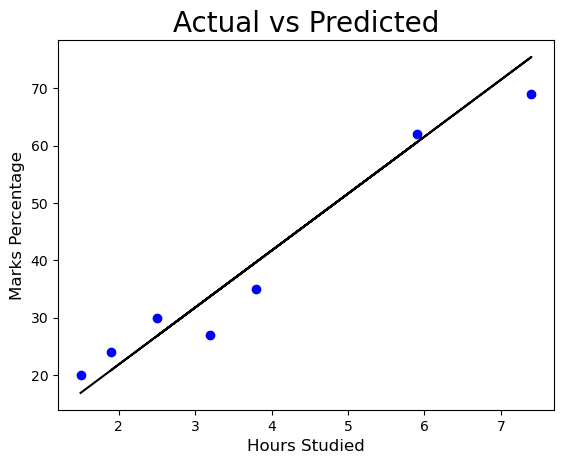

In [24]:
#Visually Comparing the Predicted Marks with the Actual Marks
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
     

In [25]:
#Evaluating the Model
#Calculating the accuracy of the model
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(val_y,pred_y))

Mean Absolute Error: 4.130879918502486


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.



### Predicted score of a student if he/she studies for 9.25 hrs/ day

In [26]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


# According to the regression model


### If a student studies for 9.25 hours a day. 
### He/she is likely to score 93.89 marks.